# Download Captchas

In [1]:



import urllib.request
import os

original_dir = "tmp/original_captchas"

if not os.path.exists(original_dir):
    os.makedirs(original_dir)

imgURL = "http://www.erpstcourier.com/captcha/captcha.php?rand=146398747"

for i in range(40):
    print(i)

    urllib.request.urlretrieve(imgURL, f"{original_dir}/{i}.png")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


# Read Original Captchas Images

In [1]:
import os
original_dir = "tmp/original_captchas"

captchas_images = []

for filename in os.listdir(original_dir):
    
    print(os.path.join(original_dir, filename))
    captchas_images.append(os.path.join(original_dir, filename))

tmp/original_captchas/19.png
tmp/original_captchas/4.png
tmp/original_captchas/5.png
tmp/original_captchas/18.png
tmp/original_captchas/28.png
tmp/original_captchas/29.png
tmp/original_captchas/21.png
tmp/original_captchas/34.png
tmp/original_captchas/12.png
tmp/original_captchas/33.png
tmp/original_captchas/24.png
tmp/original_captchas/27.png
tmp/original_captchas/26.png
tmp/original_captchas/32.png
tmp/original_captchas/17.png
tmp/original_captchas/6.png
tmp/original_captchas/22.png
tmp/original_captchas/14.png
tmp/original_captchas/39.png
tmp/original_captchas/7.png
tmp/original_captchas/23.png
tmp/original_captchas/16.png
tmp/original_captchas/13.png
tmp/original_captchas/15.png
tmp/original_captchas/8.png
tmp/original_captchas/30.png
tmp/original_captchas/10.png
tmp/original_captchas/25.png
tmp/original_captchas/0.png
tmp/original_captchas/38.png
tmp/original_captchas/1.png
tmp/original_captchas/31.png
tmp/original_captchas/36.png
tmp/original_captchas/9.png
tmp/original_captchas/

In [6]:
try:
    from PIL import Image
except ImportError:
    import Image


import imutils

import cv2
import numpy as np

solved_captchas_dir='tmp/solved_captchas'
import os
if not os.path.exists(solved_captchas_dir):
    os.makedirs(solved_captchas_dir)


def captcha_solver(image_path):

    print(image_path)
    # image= Image.open('18.png')
    image = cv2.imread(image_path)
    # print(image.shape)

    frame = image[0:40, 20:100] 



    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    # Blue color
    low_blue = np.array([100, 10, 20])
    high_blue = np.array([126, 255, 255])
    blue_mask = cv2.inRange(hsv, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

    gray = cv2.cvtColor(blue, cv2.COLOR_BGR2GRAY)

    invet_gray  = 255- gray

    img_bw = 255*(invet_gray).astype('uint8')

    element = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    mask = cv2.erode(img_bw, element, iterations = 1)
    mask = cv2.dilate(mask, element, iterations = 1)
    mask = cv2.erode(mask, element)

    mask = np.dstack([mask, mask, mask]) / 255

    masked = (hsv* mask)


    cv2.imwrite('tmp/tmp.png', masked)

    masked_inverted = 255- cv2.imread("tmp/tmp.png")



    img_grey = cv2.cvtColor(masked_inverted, cv2.COLOR_BGR2GRAY)

    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 250

    # threshold the image
    image_frame = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]





    cv2.imwrite('tmp/tmp.png', image_frame)


    image_frame = cv2.imread("tmp/tmp.png")

    # Simple image to string

    import pytesseract
    detected=pytesseract.image_to_string(image_frame, lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz')
    # print('Detected: ', detected)

    import re
    onlytextnumber = re.sub('[\W_]+', '', detected)
    
    result = onlytextnumber[-4:]


    return [image_frame ,result]









tmp/original_captchas/19.png


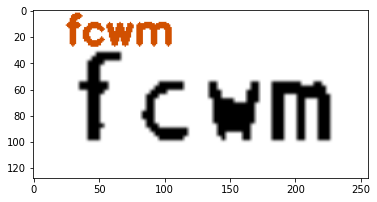

Captcha fcwm
tmp/original_captchas/4.png


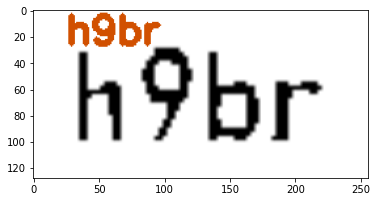

Captcha h9br
tmp/original_captchas/5.png


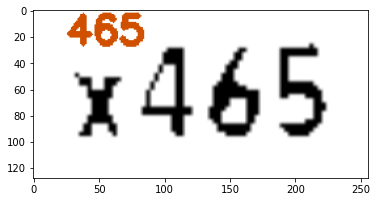

Captcha 465
tmp/original_captchas/18.png


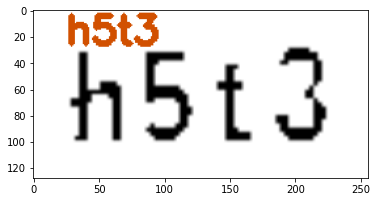

Captcha h5t3
tmp/original_captchas/28.png


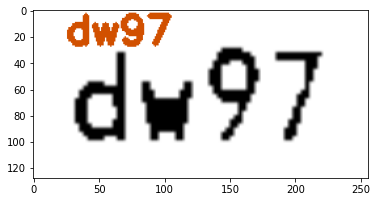

Captcha dw97
tmp/original_captchas/29.png


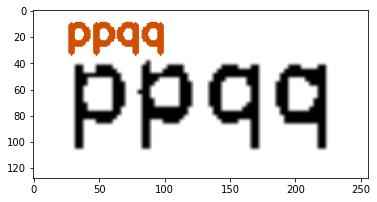

Captcha ppqq
tmp/original_captchas/21.png


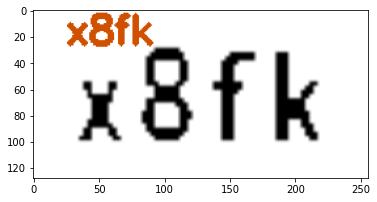

Captcha x8fk
tmp/original_captchas/34.png


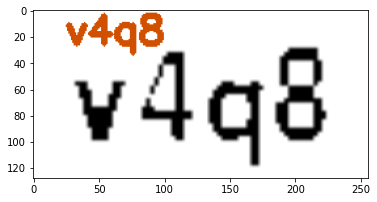

Captcha v4q8
tmp/original_captchas/12.png


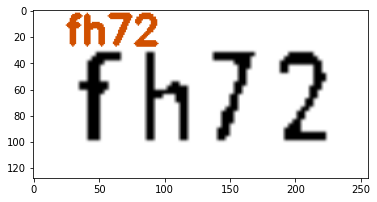

Captcha fh72
tmp/original_captchas/33.png


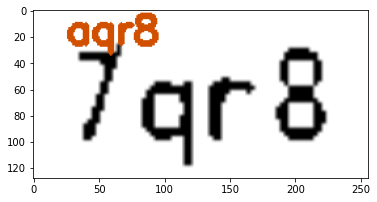

Captcha aqr8
tmp/original_captchas/24.png


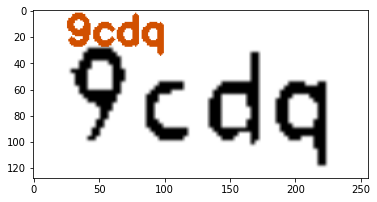

Captcha 9cdq
tmp/original_captchas/27.png


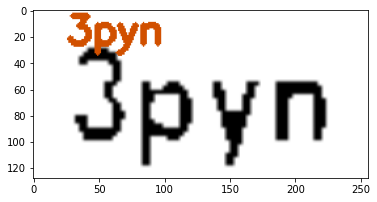

Captcha 3pyn
tmp/original_captchas/26.png


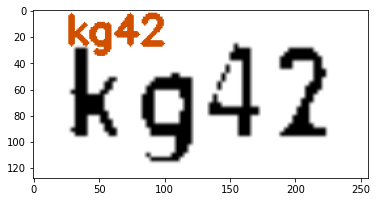

Captcha kg42
tmp/original_captchas/32.png


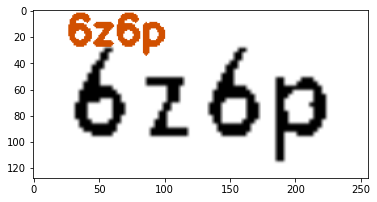

Captcha 6z6p
tmp/original_captchas/17.png


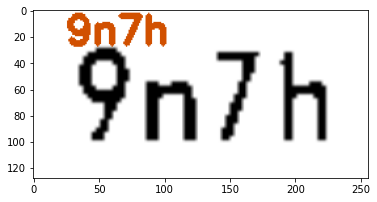

Captcha 9n7h
tmp/original_captchas/6.png


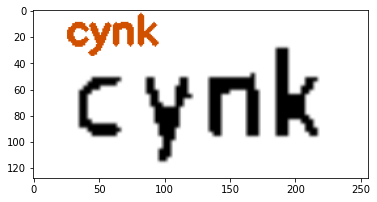

Captcha cynk
tmp/original_captchas/22.png


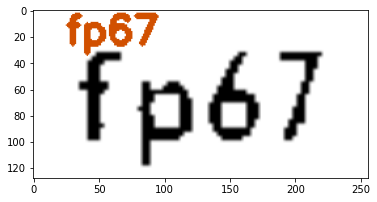

Captcha fp67
tmp/original_captchas/14.png


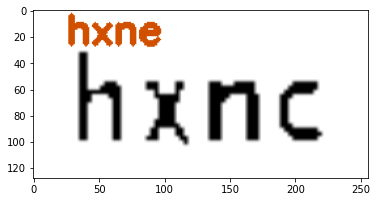

Captcha hxne
tmp/original_captchas/39.png


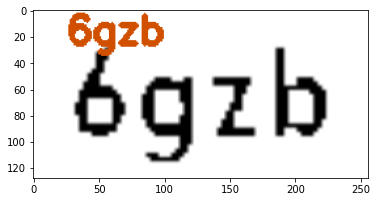

Captcha 6gzb
tmp/original_captchas/7.png


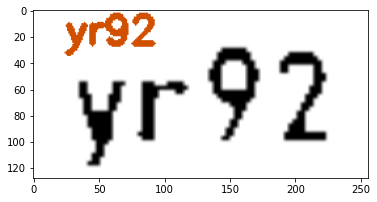

Captcha yr92
tmp/original_captchas/23.png


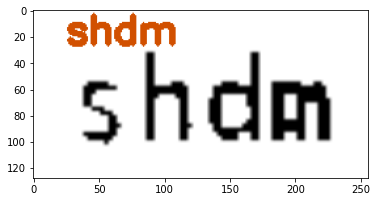

Captcha shdm
tmp/original_captchas/16.png


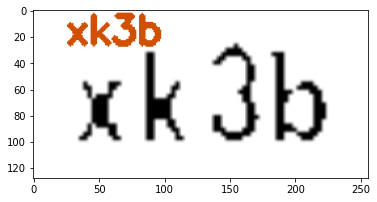

Captcha xk3b
tmp/original_captchas/13.png


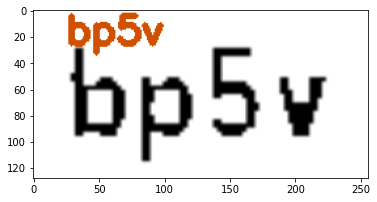

Captcha bp5v
tmp/original_captchas/15.png


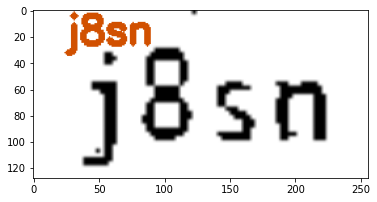

Captcha j8sn
tmp/original_captchas/8.png


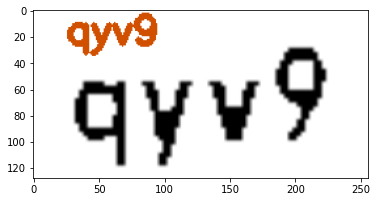

Captcha qyv9
tmp/original_captchas/30.png


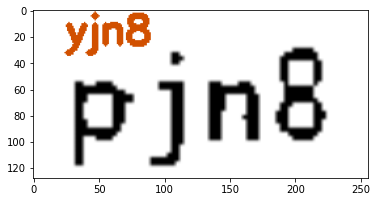

Captcha yjn8
tmp/original_captchas/10.png


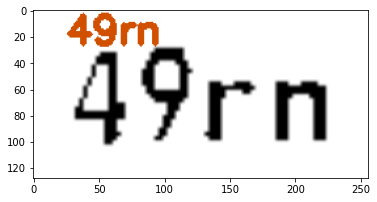

Captcha 49rn
tmp/original_captchas/25.png


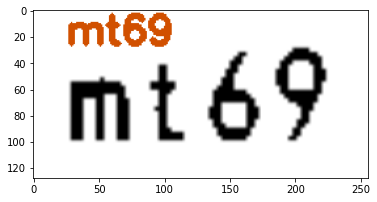

Captcha mt69
tmp/original_captchas/0.png


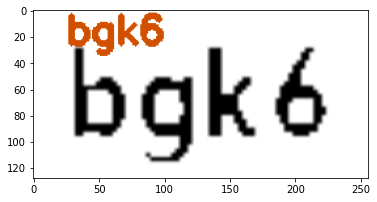

Captcha bgk6
tmp/original_captchas/38.png


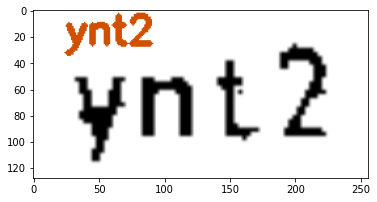

Captcha ynt2
tmp/original_captchas/1.png


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt

results=[]

for image in captchas_images:
    result=captcha_solver(image)
    results.append(result)
    img=result[0]

    result[0] = cv2.resize(img,(256,128))

    cv2.putText(
          result[0], #numpy array on which text is written
          result[1], #text
          (25,25), #position at which writing has to start
          cv2.FONT_HERSHEY_SIMPLEX, #font family
          1, #font size
          (209, 80, 0, 255), #font color
          3) 
    plt.imshow(result[0])
    plt.show()
    print('Captcha',result[1])

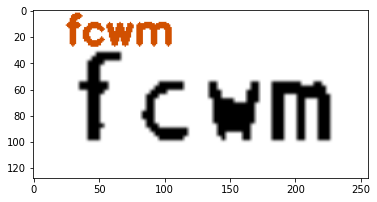

Captcha fcwm


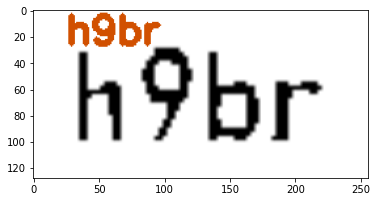

Captcha h9br


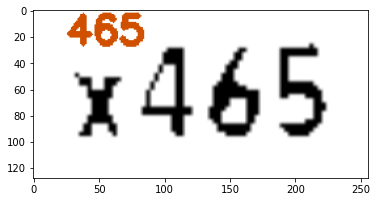

Captcha 465


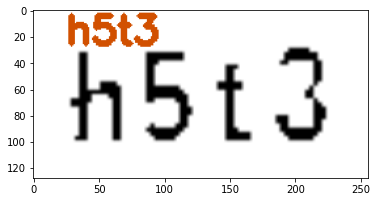

Captcha h5t3


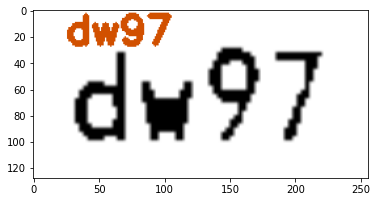

Captcha dw97


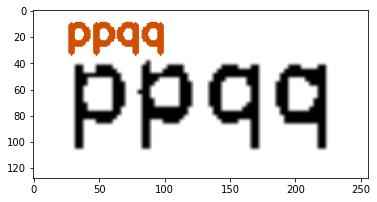

Captcha ppqq


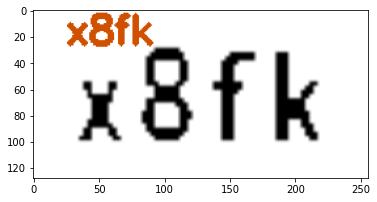

Captcha x8fk


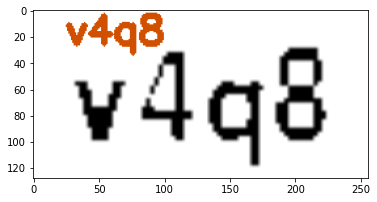

Captcha v4q8


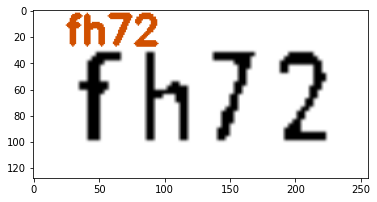

Captcha fh72


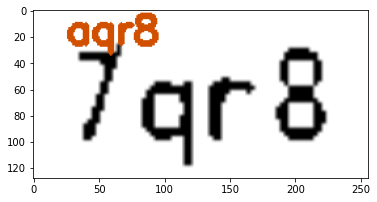

Captcha aqr8


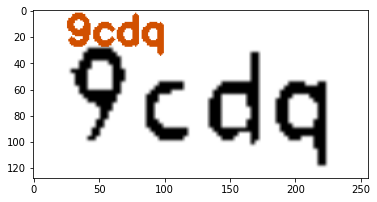

Captcha 9cdq


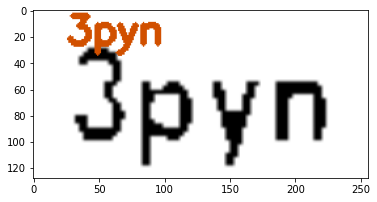

Captcha 3pyn


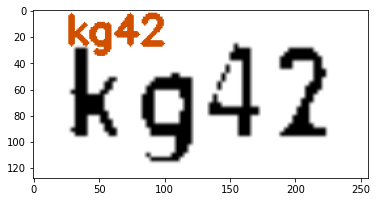

Captcha kg42


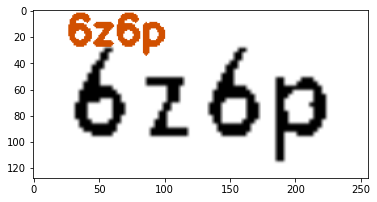

Captcha 6z6p


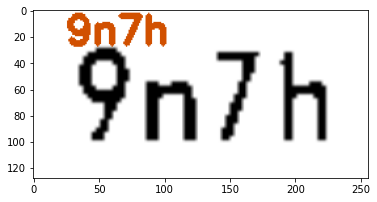

Captcha 9n7h


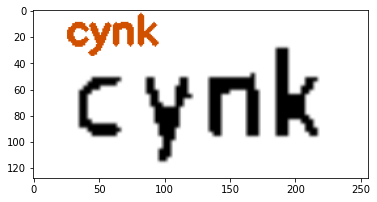

Captcha cynk


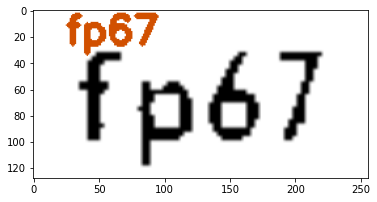

Captcha fp67


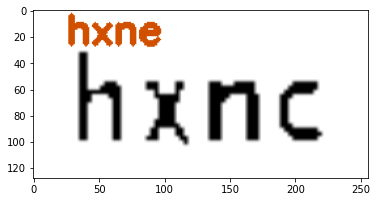

Captcha hxne


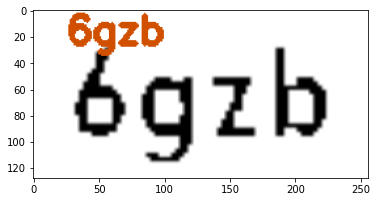

Captcha 6gzb


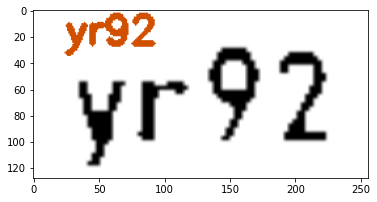

Captcha yr92


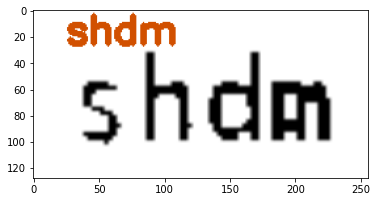

Captcha shdm


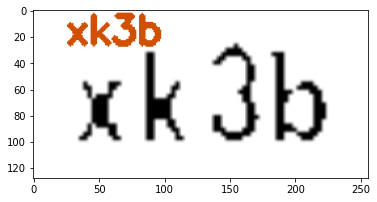

Captcha xk3b


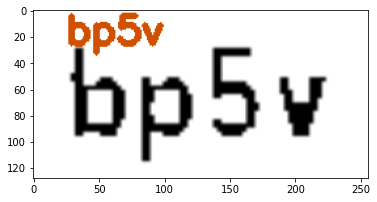

Captcha bp5v


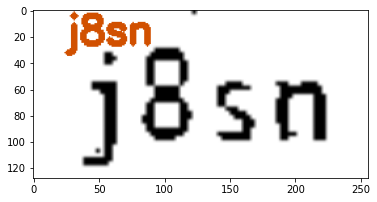

Captcha j8sn


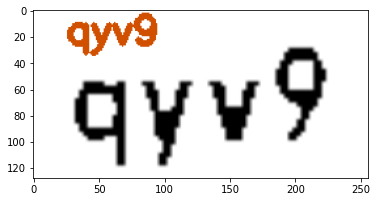

Captcha qyv9


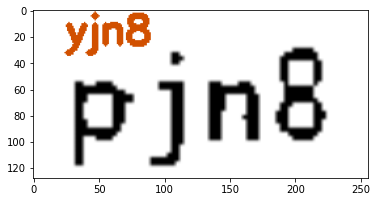

Captcha yjn8


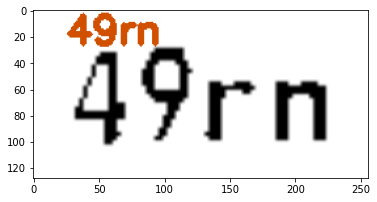

Captcha 49rn


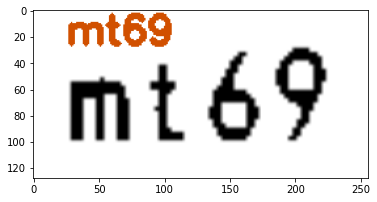

Captcha mt69


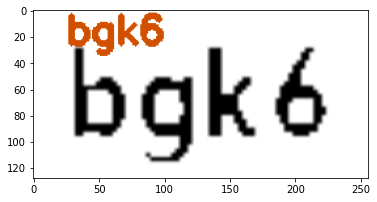

Captcha bgk6


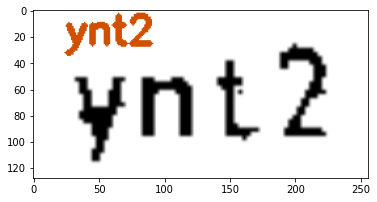

Captcha ynt2


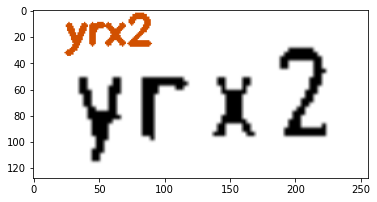

Captcha yrx2


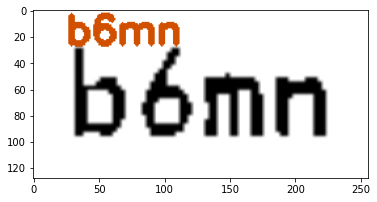

Captcha b6mn


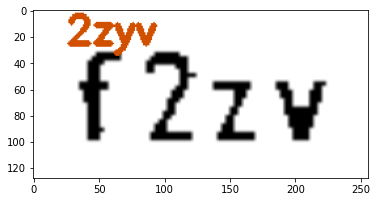

Captcha 2zyv


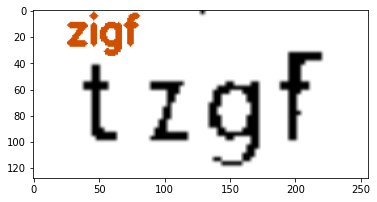

Captcha zigf


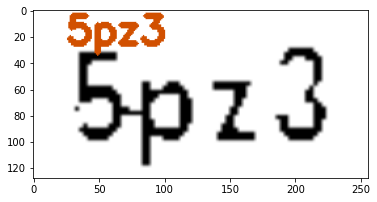

Captcha 5pz3


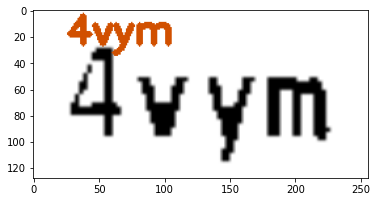

Captcha 4vym


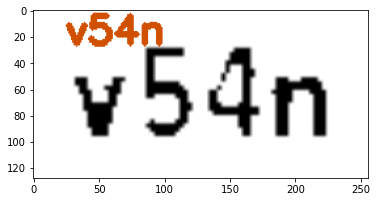

Captcha v54n


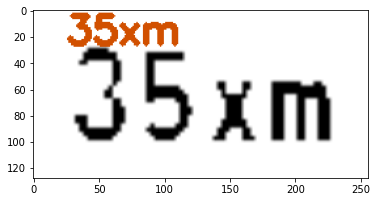

Captcha 35xm


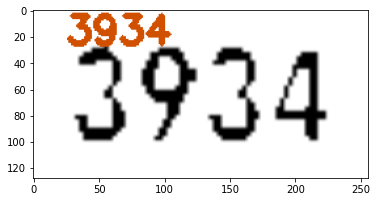

Captcha 3934


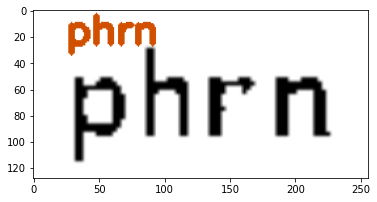

Captcha phrn


In [5]:

solved_captchas_dir = "tmp/solved_captchas"

import os
if not os.path.exists(solved_captchas_dir):
    os.makedirs(solved_captchas_dir)

for result in results:
     img=result[0]
     name=result[1]
     cv2.imwrite(f'{solved_captchas_dir}/{name}.png',img)

     plt.imshow(img)
     plt.show()
     print('Captcha',result[1])
     
